# Linear Regression

Recall that Regression problems are aiming to predict continuous values (e.g. Price, Age, Salary, ...)

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

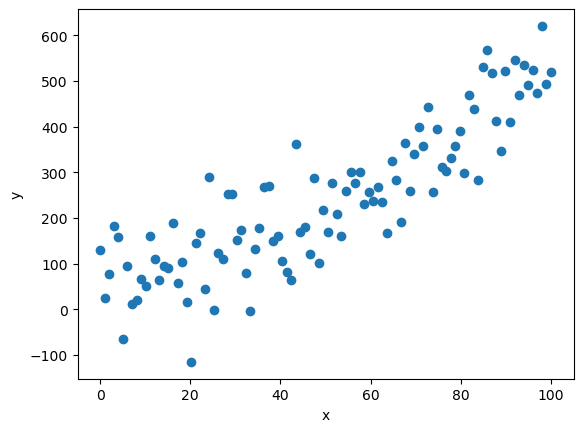

In [112]:
# Plot Data
np.random.seed(0)
x = np.linspace(0, 100, 100)
y = 5 * x - 12
ry = np.random.normal(scale=80,size=y.shape[0]) + y
# Initilize a DataFrame for the data
data = pd.DataFrame({'x': x, 'y':ry}).sample(frac=1).reset_index()[['x', 'y']]
plt.plot(x, ry, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

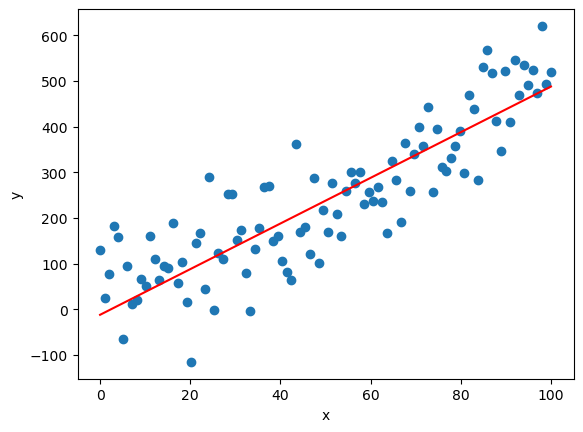

In [113]:
# Plot data with ground truth
plt.plot(x, ry, 'o')
plt.plot(x, y, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Psss...** <br>
The ground truth line is $y = 5x-12$. But, let's see if our Linear Regression model can discover this.

In [114]:
# Display data
data

,x,y
0,19.191919,15.631937
1,6.060606,94.310104
2,45.454545,180.226783
3,57.575758,300.076540
4,22.222222,168.266007
...,...,...
95,13.131313,63.390567
96,31.313131,174.818658
97,85.858586,568.964063
98,70.707071,399.862599


The line we want to find has the form:
$$\hat{y} = \sum_{i=1}^{d} w_i \cdot x + w_0$$
And because we have only **one** variable, this can be written as:
$$\hat{y} = w_1 \cdot x + w_0$$

The whole goal of **model fitting** is to find the weigths $w_i$ such that it results in the least prediction error.

We code the **Maths** behind Linar Regression that we studied in the last lesson.

Outline:
- Loss function
- Derivative to find steepest direction
- Parameters update

In [115]:
x = x / x.max()

In [116]:
w = 0.0
b = 0.0
alpha = 1
n_iter = 1000
for i in range(n_iter):
    loss = np.mean((x*w+b-y)**2)
    if i % 10 == 0:
        print(f"Loss after iter {i:^6} is {loss}") 
    dj_dw = np.mean((w * x + b - y) * x)
    # print('dj_dw:', dj_dw * alpha)
    dj_db = np.mean(x * w + b - y)
    
    w = w - alpha * dj_dw
    b = b - (dj_db * alpha)
    

Loss after iter   0    is 77898.20875420877
Loss after iter   10   is 3333.905278665261
Loss after iter   20   is 831.9999172097364
Loss after iter   30   is 207.63153252001774
Loss after iter   40   is 51.81593459911782
Loss after iter   50   is 12.931037235980586
Loss after iter   60   is 3.227032867243931
Loss after iter   70   is 0.8053291422978026
Loss after iter   80   is 0.20097564980425947
Loss after iter   90   is 0.05015491144278647
Loss after iter  100   is 0.01251651702225603
Loss after iter  110   is 0.0031235863819068623
Loss after iter  120   is 0.0007795133316949215
Loss after iter  130   is 0.00019453312954956155
Loss after iter  140   is 4.8547134415147627e-05
Loss after iter  150   is 1.2115284761065626e-05
Loss after iter  160   is 3.0234560001149267e-06
Loss after iter  170   is 7.545250784903908e-07
Loss after iter  180   is 1.8829713216482037e-07
Loss after iter  190   is 4.6990896643474393e-08
Loss after iter  200   is 1.172691449027031e-08
Loss after iter  210 

In [118]:
x

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [117]:
w, b

(499.9999999999998, -11.999999999999881)

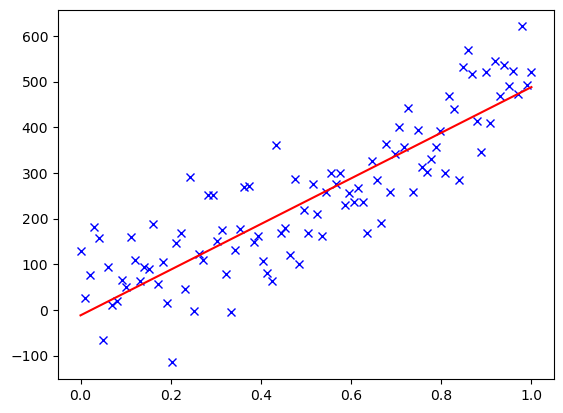

In [119]:
plt.plot(x, ry, 'bx')
plt.plot(x, w*x+b, 'r')